# Linear RANSAC Algorithm


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

In [2]:
def func(x_point, k, b):
    return x_point*k + b

In [3]:
def generate_y(x_point, k, b, sigma, isOutliers:bool):
    y_point = func(x_point, k, b) + np.random.normal(0, sigma)
    if(isOutliers):
        y_point += np.random.uniform(-30, 30)
    return y_point

In [4]:
def generate_data(k:float=1, b:float=0, numberOfPoints:int=1000, p:float=0.9, sigma:float=1.0):
    inliers = int(numberOfPoints*p)
    outliers = int(numberOfPoints*(1-p))
    
    x_points_inliers = np.random.uniform(-10, 10, inliers)
    x_points_outliers = np.random.uniform(-10, 10, outliers)
    
    y_points_inliers = [generate_y(x, k, b, sigma, isOutliers=False) for x in x_points_inliers]
    y_points_outliers = [generate_y(x, k, b, sigma, isOutliers=True) for x in x_points_outliers]
    
    x_points = np.concatenate([x_points_inliers, x_points_outliers])
    y_points = np.concatenate([y_points_inliers, y_points_outliers])
    
    return x_points, y_points

## Linear RANSAC

### Helper function to find coefficients

$y = kx + b$
$ \\ $
$ k = \dfrac{y_2 - y_1}{x_2 - x_1}$
$ \\ $
$ b = y - kx$

In [5]:
def find_coefficients(points:np.ndarray):
    #print(points[0][0], points[0][1], points[1][1], points[1][0])
    k = (points[1][1] - points[0][1]) / (points[1][0] - points[0][0])
    b = points[0][1] - k*points[0][0]
    return k, b

In [6]:
def linear_ransac(x_points, y_points, iterations=1000, eps = 1.0):
    best_score = 0
    best_k = 0
    best_b = 0
    
    for iter in range(iterations):
        indices = np.random.randint(0, x_points.size-1, size=2)
        
        if(indices[0]==indices[1]):
            break
            
        k, b = find_coefficients(np.array([
                                          [x_points[indices[0]], y_points[indices[0]]],
                                          [x_points[indices[1]], y_points[indices[1]]]
                                          ]))
        current_score = 0
        
        for index in range(x_points.size):
            y_predicted = k*x_points[index] + b
            if(np.abs(y_points[index] - y_predicted) < eps):
                current_score += 1
                
        if(current_score > best_score):
            best_score = current_score
            best_k = k
            best_b = b
    
    print(f"Best score = {best_score} with precision {best_score / x_points.size}")
    print(f"Best k: {best_k}; Best b: {best_b} " )
    
    return best_k, best_b

## Let's test the algorithm

In [7]:
x, y = generate_data(numberOfPoints=150, sigma=1.0)
k, b = linear_ransac(x, y)
y_predicted = np.array([-10*k+b, +10*k+b])

Best score = 89 with precision 0.5973154362416108
Best k: 1.0074936518897923; Best b: -0.22655599563188555 


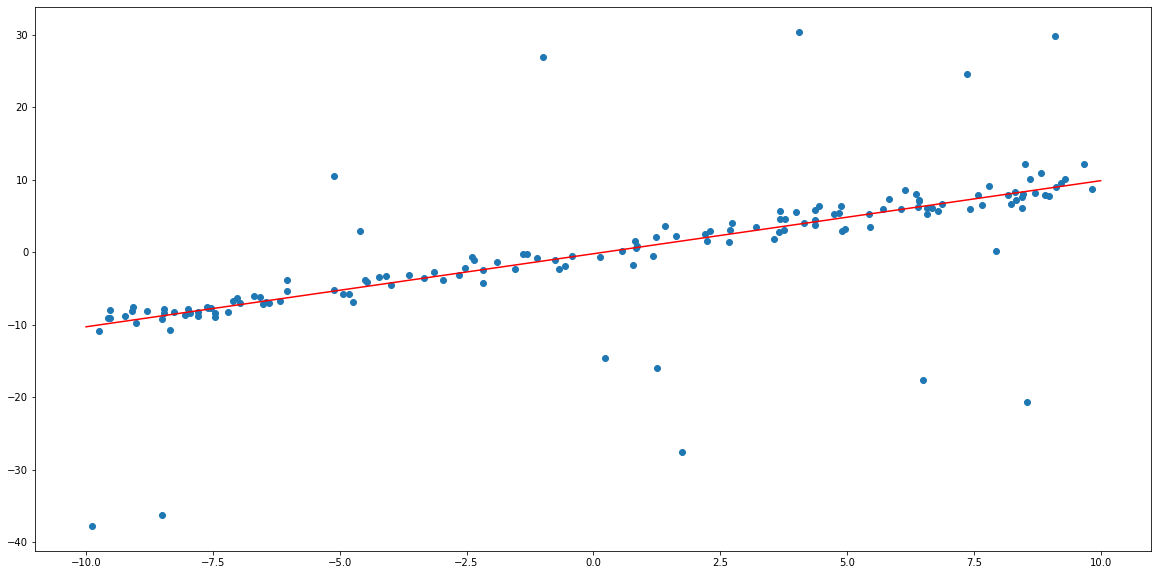

In [8]:
fig = plt.figure(figsize=[20, 10])
plt.scatter(x, y)
plt.plot((-10,10), y_predicted, "red")